In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

/Users/alexderhacobian/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
jsonformer_file = 'jsonformer-dolly-10_iters.csv'
jsonformer_df = pd.read_csv(jsonformer_file)

In [4]:
batch_sizes = [2,4,6,8]
batched_files = [
    f'batched-json-dolly-10_iters-{batch_size}_batchsize.csv' for batch_size in batch_sizes
]

batched_dfs = [pd.read_csv(file) for file in batched_files]

In [5]:
unbatched_file = 'batched-json-dolly-10_iters-unbatched.csv'
unbatched_df = pd.read_csv(unbatched_file)

### Line Plot Batch Size vs. Inference Time

In [6]:
time_taken_avgs = []
for df in batched_dfs:
    time_taken_avg = df.loc[:, 'time_taken'].mean()
    time_taken_avgs.append(time_taken_avg)

[Text(0.5, 1.0, 'Mean Prompt-Wise \n Inference Time (s)')]

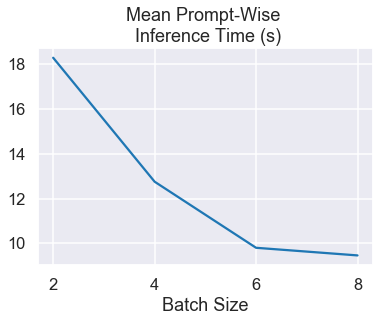

In [7]:
y_axis_name =  ""
x_axis_name = "Batch Size"
title = "Mean Prompt-Wise \n Inference Time (s)"

batch_line_plot = {
   x_axis_name : batch_sizes, 
   y_axis_name : time_taken_avgs
}
sns.set_context("talk")
sns.set_style('darkgrid')
sns.lineplot(data=batch_line_plot, x=x_axis_name, y=y_axis_name).set(title = title)

### Promptwise Inference Times

In [8]:
def get_avg_promptwise_times(num_prompts, num_iters, df):
    time_taken = df['time_taken'].to_numpy()
    avg_promptwise_times = []

    for prompt in range(num_prompts):
        indexes = np.arange(prompt, num_iters * num_prompts, num_prompts)
        promptwise_times = [time_taken[index] for index in indexes]
        avg_promptwise_time = np.mean(promptwise_times)
        avg_promptwise_times.append(avg_promptwise_time)

    return avg_promptwise_times

In [12]:
num_prompts = 8
num_iters = 10

jsonformer_avg_promptwise_times = get_avg_promptwise_times(num_prompts, 
                                                           num_iters, 
                                                           jsonformer_df)

batched_avg_promptwise_times = get_avg_promptwise_times(num_prompts, 
                                                        num_iters, 
                                                        batched_dfs[-1])

unbatched_avg_promptwise_times = get_avg_promptwise_times(num_prompts, 
                                                          num_iters, 
                                                          unbatched_df)

In [10]:
all_avg_promptwise_times = jsonformer_avg_promptwise_times + batched_avg_promptwise_times + unbatched_avg_promptwise_times
run_names = (["JSONFormer"] * len(jsonformer_avg_promptwise_times)
             + ["Batched"] * len(batched_avg_promptwise_times)
             + ["Serial"] * len(unbatched_avg_promptwise_times))
prompt_names = [f"{i}" for i in range(1, len(jsonformer_avg_promptwise_times) + 1)] * 3

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")

data_dict = {
    "Inference Time (s)" : all_avg_promptwise_times,
    "Prompt" : prompt_names, 
    "Method" : run_names}

barplot_data = pd.DataFrame(data_dict)

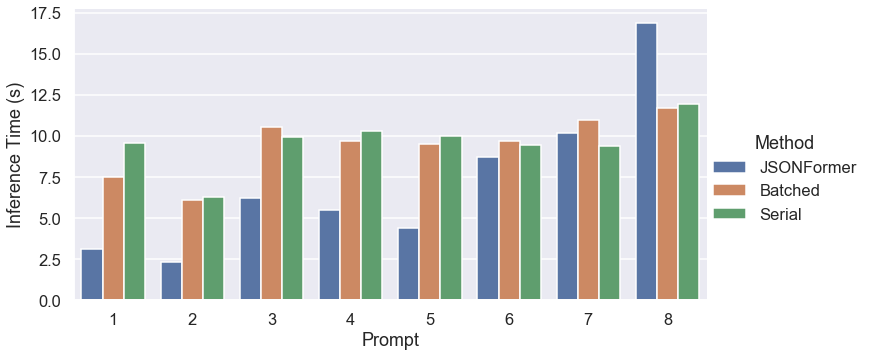

In [15]:
sns.set_context("talk")
sns.set_style('darkgrid')
g = sns.catplot(
    data=barplot_data, kind="bar",
    x="Prompt", y="Inference Time (s)", hue="Method", aspect = 2
)